In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn import svm

In [2]:
data = pd.read_csv('/content/drive/MyDrive/supervised_learning/dataset.csv')

In [3]:
data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [4]:
features = data.iloc[:,2:-1]
target = data.iloc[:,-1]


In [5]:
#Pretraitement des donnes (On remplace les valeurs nan par la moyenne des eleemnt de la colonne concerné)  
mean_value_1=features['Sensor1_PM2.5'].mean() 
mean_value_2=features['Sensor2_PM2.5'].mean()
mean_value_3=features['Temperature'].mean()
mean_value_4=features['Relative_Humidity'].mean()
features['Sensor1_PM2.5'].fillna(value=mean_value_1, inplace=True) 
features['Sensor2_PM2.5'].fillna(value=mean_value_2, inplace=True) 
features['Temperature'].fillna(value=mean_value_3, inplace=True) 
features['Relative_Humidity'].fillna(value=mean_value_4, inplace=True) 

In [6]:
#Nous allons standardizer les features
def scale(feature):
  return (feature - feature.mean())/feature.std()

features_scaled = scale(features)
features_scaled.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,0.417209,0.398166,-1.551276,1.181291
1,-0.194031,-0.167984,0.441387,-0.248812
2,-0.760830,-0.515682,0.415168,-0.248812
3,-0.753070,-0.797352,0.415168,-0.589313
4,-0.086455,-0.119868,-0.633602,0.704590


In [7]:
#Convertir en matrice numpy
features_np = features_scaled.values
target_np = target.values
target_np.shape

(297177,)

In [8]:
#Etablir les données d'entraînement et de test
x_train,x_test,y_train,y_test = train_test_split(features_np,target_np,test_size=0.2)
#Mise en forme 
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(237741, 4) (237741, 1) (59436, 4) (59436, 1)


In [9]:
#Creer le modele SVM
classificateur = svm.SVC(kernel='linear')
classificateur.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [10]:
y_pred = classificateur.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     37316
           1       0.86      0.87      0.86     22120

    accuracy                           0.90     59436
   macro avg       0.89      0.89      0.89     59436
weighted avg       0.90      0.90      0.90     59436



# Etablissons l'algorithme SVM

# Contrainte (Marge dure)

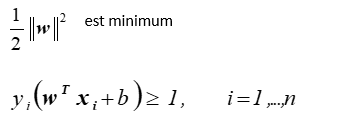

# Hinge Loss

L = max(0, 1- y*f(x))

# Marge douce

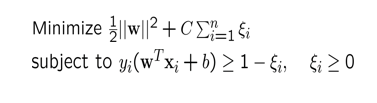

In [26]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=10):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros((n_features,1))
        self.b = 2

        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)- 0.0001*y_[idx]
                    self.b -= self.lr * y_[idx]

    def outcome(self,X):
      return np.dot(X, self.w) - self.b

    def predict_proba(self, X):
      approx = np.dot(X, self.w) - self.b
      return np.sign(approx)

    def predict(self, x):
      proba= self.predict_proba(x) # Get probability of x
      # Convert proba to 0 or 1. hint: list comprehension
      proba = np.where(proba > 0, 1, proba)
      proba = np.where(proba <= 0, 0, proba)
      return proba

    def accuracy(self,y_true,y_pred):
      return (np.sum(y_pred==y_true)/len(y_true))*100
    
    def hinge_loss(self,actual, predicted):
      # replacing 0 = -1
      predicted = np.array([-1 if i==0 else i for i in predicted])
      actual = np.array([-1 if i==0 else i for i in actual])
      # calculating hinge loss
      hinge_loss = np.mean([max(0, 1-x*y) for x, y in zip(actual, predicted)])
      return hinge_loss

In [27]:
model = SVM()
model.fit(x_train,y_train)

In [28]:
y_pred = model.predict(x_test)

In [29]:
one = np.ones((y_pred.shape[0],1))
print(model.hinge_loss(y_test,y_pred))

[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [30]:
print(model.accuracy(y_test,y_pred))

62.78349821656908
